In [ ]:
# Installation of imported packages. Uncomment and use what is needed.

import sys
# !{sys.executable} -m pip install --user numpy
# !{sys.executable} -m pip install --user matplotlib
!{sys.executable} -m pip install --user scikit-learn


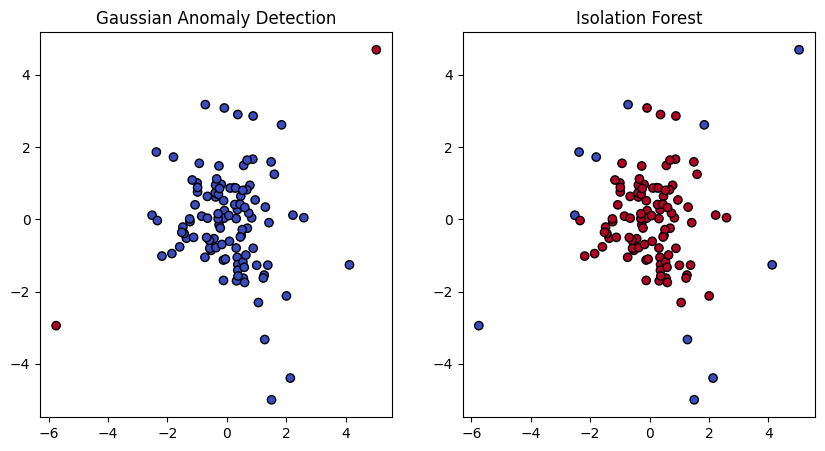

In [5]:
# Examples for Anomaly Detection

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# -------------------------
# 1. Synthetic dataset
# -------------------------
# Normal data ~ Gaussian
X_normal = np.random.normal(0, 1, size=(100, 2))
# Add some anomalies
X_anomalies = np.random.uniform(low=-6, high=6, size=(10, 2))
X = np.vstack([X_normal, X_anomalies])

# -------------------------
# 2. Gaussian Anomaly Detection (course-style)
# -------------------------
mu = np.mean(X_normal, axis=0)
sigma2 = np.var(X_normal, axis=0)

def gaussian_prob(x, mu, sigma2):
    return (1 / np.sqrt(2 * np.pi * sigma2)) * np.exp(-(x - mu) ** 2 / (2 * sigma2))

def anomaly_score(x, mu, sigma2):
    # Product of probabilities across features
    probs = gaussian_prob(x, mu, sigma2)
    return np.prod(probs, axis=1)

p = anomaly_score(X, mu, sigma2)

# Choose threshold epsilon (simple heuristic: 1st percentile)
epsilon = np.percentile(p, 1)
y_pred_gaussian = (p < epsilon).astype(int)  # 1 = anomaly

# -------------------------
# 3. Modern method: Isolation Forest
# -------------------------
clf = IsolationForest(contamination=0.1, random_state=42)
y_pred_iforest = clf.fit_predict(X)  # -1 = anomaly, 1 = normal

# -------------------------
# 4. Visualization
# -------------------------
plt.figure(figsize=(10, 5))

# Gaussian method
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_gaussian, cmap="coolwarm", edgecolors="k")
plt.title("Gaussian Anomaly Detection")

# Isolation Forest
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_iforest, cmap="coolwarm", edgecolors="k")
plt.title("Isolation Forest")

plt.show()

In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# -------------------------
# 1. Ground truth labels
# -------------------------
# Automatically detect sizes from X_normal and X_anomalies
n_normal = X_normal.shape[0]
n_anomalies = X_anomalies.shape[0]

y_true = np.array([0] * n_normal + [1] * n_anomalies)  # 0=normal, 1=anomaly

# -------------------------
# 2. Align predictions
# -------------------------
# Gaussian model outputs: 0=normal, 1=anomaly
y_pred_gaussian_binary = y_pred_gaussian

# Isolation Forest outputs: -1=anomaly, 1=normal
y_pred_iforest_binary = np.where(y_pred_iforest == -1, 1, 0)

# -------------------------
# 3. Define a helper function
# -------------------------
def evaluate_model(y_true, y_pred, name="Model"):
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    print(f"{name} → Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}")

# -------------------------
# 4. Evaluate both models
# -------------------------
evaluate_model(y_true, y_pred_gaussian_binary, "Gaussian Anomaly Detection")
evaluate_model(y_true, y_pred_iforest_binary, "Isolation Forest")


Gaussian Anomaly Detection → Precision: 1.00, Recall: 0.20, F1: 0.33
Isolation Forest → Precision: 0.64, Recall: 0.70, F1: 0.67


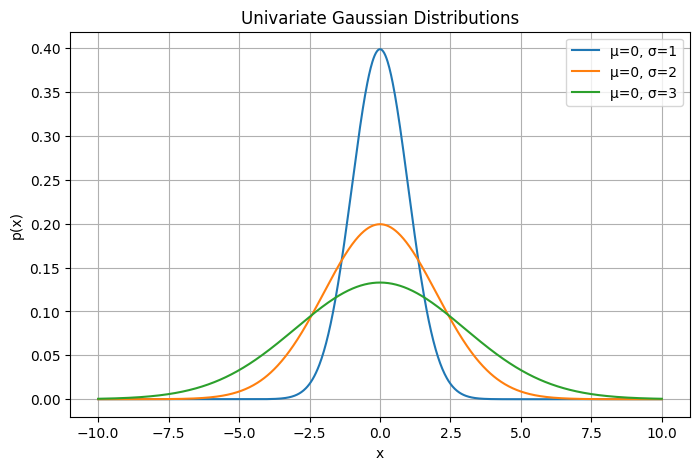

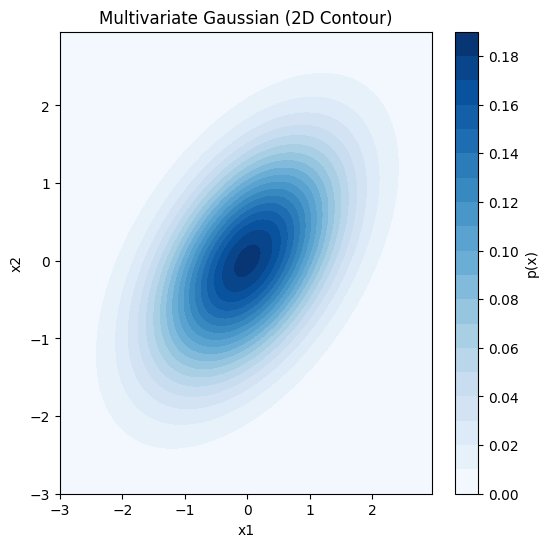

In [1]:
# Examples for Gaussian Distributions

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# -------------------------
# 1. Univariate Gaussians
# -------------------------
x = np.linspace(-10, 10, 1000)
mu = 0
sigmas = [1, 2, 3]

plt.figure(figsize=(8, 5))
for sigma in sigmas:
    y = norm.pdf(x, mu, sigma)
    plt.plot(x, y, label=f"μ={mu}, σ={sigma}")
plt.title("Univariate Gaussian Distributions")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------
# 2. Multivariate Gaussian (2D contour plot)
# -------------------------
from scipy.stats import multivariate_normal

mu = np.array([0, 0])
sigma = np.array([[1, 0.5], [0.5, 1]])  # covariance matrix
rv = multivariate_normal(mean=mu, cov=sigma)

x, y = np.mgrid[-3:3:.05, -3:3:.05]
pos = np.dstack((x, y))
z = rv.pdf(pos)

plt.figure(figsize=(6, 6))
plt.contourf(x, y, z, levels=20, cmap="Blues")
plt.title("Multivariate Gaussian (2D Contour)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.colorbar(label="p(x)")
plt.show()